### Import Necessary Libraries

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


### Load Data

In [4]:
data = pd.read_csv("data/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Basic data analysis

In [5]:
# Check size of data
data.shape

(7043, 21)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Total columns in data
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
# Data types of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [9]:
# Check unique values in each feature
for column in data.columns:
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [10]:
# Convert TotalCharges to numeric format
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
# Check null values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Drop null values
data.dropna(inplace=True)

In [13]:
# Drop customerID
clean_data = data.drop('customerID', axis=1)

Encoding categorical Features

In [14]:
# Labels encoding columns
le_columns = []
# One hot encoding columns
ohe_columns = []
columns = clean_data.columns
for col in columns:
    if clean_data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le_columns.append(col)
        else:
            ohe_columns.append(col)

In [19]:
# Perform label encoding
clean_data[le_columns] = clean_data[le_columns].apply(LabelEncoder().fit_transform)

# One hot encoding
encoded_data = pd.get_dummies(clean_data, columns = ohe_columns, dtype=int, drop_first=True) 

In [17]:
clean_data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [20]:
encoded_data.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             int32
MultipleLines_Yes                          int32
InternetService_Fiber optic                int32
InternetService_No                         int32
OnlineSecurity_No internet service         int32
OnlineSecurity_Yes                         int32
OnlineBackup_No internet service           int32
OnlineBackup_Yes                           int32
DeviceProtection_No internet service       int32
DeviceProtection_Yes                       int32
TechSupport_No inter

In [21]:
encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


## Data Analysis

In [22]:
# Check dependent variable count
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

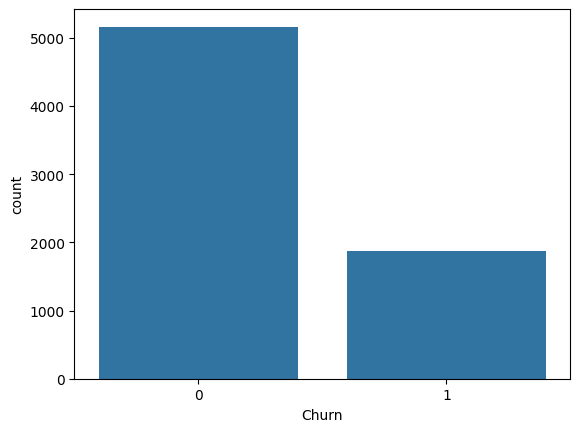

In [25]:
sns.barplot(encoded_data['Churn'].value_counts())

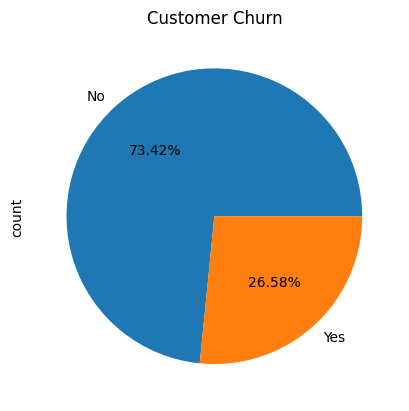

In [24]:
counts = data['Churn'].value_counts()
counts.plot.pie(autopct='%.2f%%')
plt.title("Customer Churn")
plt.savefig("1_customer_churn.png", dpi=300)
plt.show()


Distribution of churned users against monthly charges

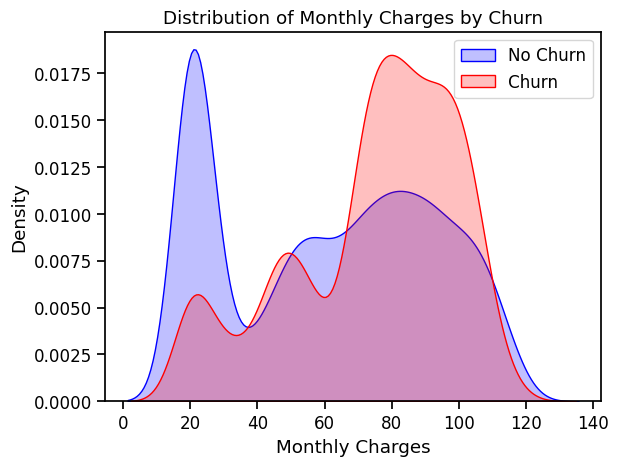

In [134]:
sns.set_context("notebook", font_scale=1.1)
ax = sns.kdeplot(clean_data.MonthlyCharges[(clean_data["Churn"] == 0) ],
                color="blue", fill = True);
ax = sns.kdeplot(clean_data.MonthlyCharges[(clean_data["Churn"] == 1) ],
                ax =ax, color="red", fill= True);
ax.legend(["No Churn","Churn"], loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of Monthly Charges by Churn');
#sns.set_context()
plt.savefig("2_monthly_charge_churn.png")
plt.show()


Distribution of Churn against Total charges

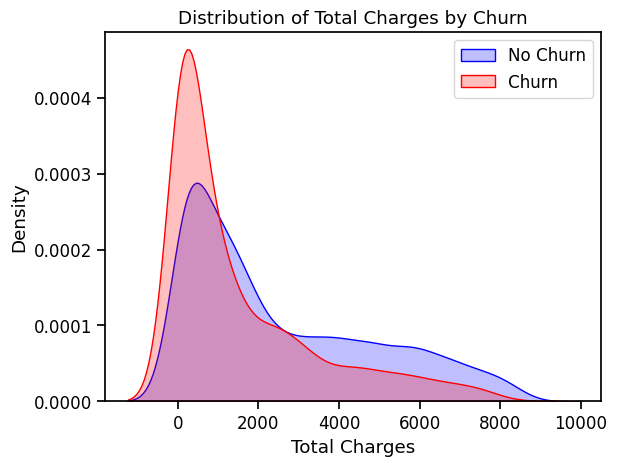

In [133]:
sns.set_context("notebook", font_scale=1.1)
ax = sns.kdeplot(clean_data.TotalCharges[(clean_data["Churn"] == 0) ],
                color="blue", fill = True);
ax = sns.kdeplot(clean_data.TotalCharges[(clean_data["Churn"] == 1) ],
                ax =ax, color="red", fill= True);
ax.legend(["No Churn","Churn"], loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of Total Charges by Churn');
#sns.set_context()

Distribution of churn against Tenure

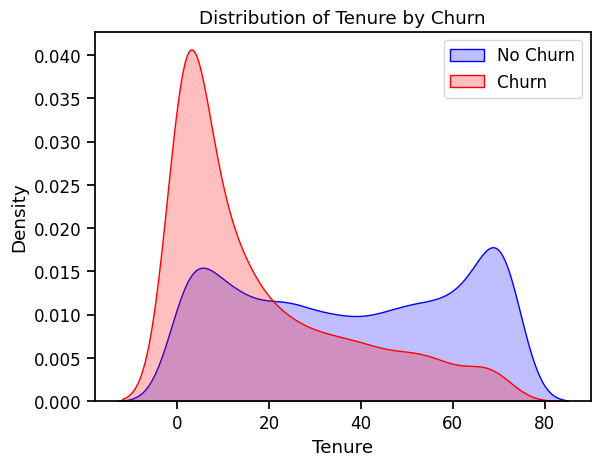

In [135]:
sns.set_context("notebook", font_scale=1.1)
ax = sns.kdeplot(clean_data.tenure[(clean_data["Churn"] == 0) ],
                color="blue", fill = True);
ax = sns.kdeplot(clean_data.tenure[(clean_data["Churn"] == 1) ],
                ax =ax, color="red", fill= True);
ax.legend(["No Churn","Churn"], loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of Tenure by Churn');
#sns.set_context()

Churn count by Internet Service Feature

[Text(0.5, 1.0, 'Churn Count by InternetService'),
 Text(0, 0.5, 'Customer Count')]

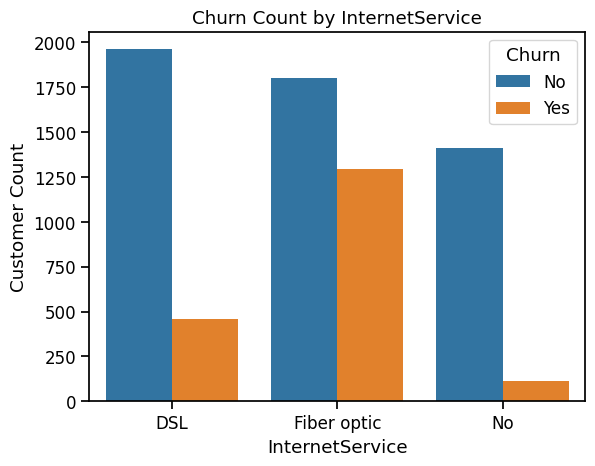

In [150]:
sns.countplot(data=data, x='InternetService', hue="Churn").set(title="Churn Count by InternetService", ylabel="Customer Count")

## Model building

In [27]:
model_data = encoded_data.copy()

In [30]:
# Keep Independent features in separate variable
x = model_data.drop('Churn', axis=1)
# Keep Dependent feature in separate variable
y = model_data['Churn']
# Apply transformation on input data
x = MinMaxScaler().fit_transform(x)


### Split data into train and test

In [33]:
# 80% data for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

##### Baseline model -  Logistic Regression

In [67]:
def LogReg_model(xtrain, ytrain):
    model = LogisticRegression(random_state=0)
    # Train the model
    model.fit(x_train, y_train)

    return model

In [82]:
# train model
model_logreg = LogReg_model(x_train, y_train)

# Predict test data
predictions = model_logreg.predict(x_test)
# Predictions
print(predictions)

# Print performance metrics
print(classification_report(y_test, predictions))

[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#### Random Forest

In [84]:
def RF_model(xtrain, ytrain):
    model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'entropy', random_state = 42)
    # Train the model
    model.fit(x_train, y_train)

    return model

In [85]:
# train model
model_rf = RF_model(x_train, y_train)

# Predict test data
predictions = model_rf.predict(x_test)
# Predictions
print(predictions)

# Print performance metrics
print(classification_report(y_test, predictions))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1033
           1       0.67      0.38      0.48       374

    accuracy                           0.78      1407
   macro avg       0.74      0.65      0.67      1407
weighted avg       0.77      0.78      0.76      1407

